In [1]:
#PCA for visualizatiom

In [5]:
from sklearn.datasets import load_digits
digits = load_digits()

In [9]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [13]:
digits.data.shape

(1797, 64)

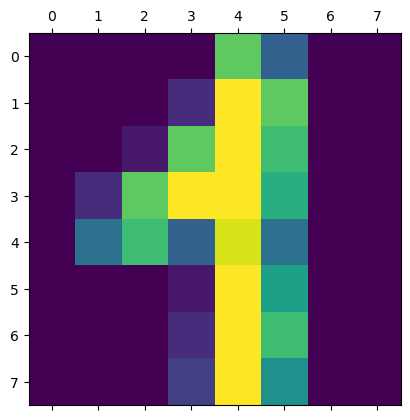

In [76]:
import matplotlib.pyplot as plt
plt.matshow(digits.images[42])
plt.show()

In [78]:
digits.target[42]

1

In [66]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
new_digits = pca.fit_transform(digits.data)

In [38]:
new_digits.shape

(1797, 2)

In [40]:
digits.data.shape

(1797, 64)

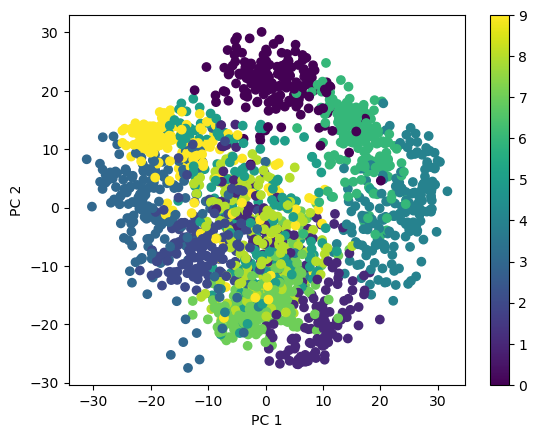

In [48]:
import matplotlib.pyplot as plt
plt.scatter(new_digits[:,0], new_digits[:,1], c = digits.target)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.colorbar()
plt.show()

In [80]:
# PCA for Speedup models
# ----------------------------Check Accuracy with normal dataset-----------------------------------

In [143]:
from sklearn.datasets import load_digits
import numpy as np

In [145]:
digits = load_digits()

In [147]:
digits.data.shape

(1797, 64)

In [149]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
new_data = sc.fit_transform(digits.data)

In [151]:
new_data_pca.data.shape

(1797, 10)

In [153]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(new_data, digits.target, test_size = 0.2, random_state = 42)

In [155]:
x_train.shape

(1437, 64)

In [157]:
x_test.shape

(360, 64)

In [159]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver = 'lbfgs', max_iter = 1000)

import time
start = time.time()
model.fit(x_train, y_train)
end = time.time()

print(str((end - start) * 1000) + " ms")

88.09018135070801 ms


In [161]:
#check for accuracy
from sklearn.metrics import accuracy_score
y_pred = model.predict(x_test)
accuracy_score(y_test, y_pred)

0.9722222222222222

In [ ]:
# ----------------------------Check Accuracy with Principal Components Analysis-----------------------------------

In [163]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 10)
new_data_pca = pca.fit_transform(new_data)

In [165]:
new_data_pca.data.shape

(1797, 10)

In [167]:
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(new_data_pca, digits.target, test_size = 0.2, random_state = 42)

In [169]:
x_train1.shape

(1437, 10)

In [171]:
x_test1.shape

(360, 10)

In [173]:
#Trian a model

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver = 'lbfgs', max_iter = 1000)

import time
start = time.time()
model.fit(x_train1, y_train1)
end = time.time()

print(str((end - start) * 1000) + " ms")

81.00032806396484 ms


In [177]:
#check for accuracy

from sklearn.metrics import accuracy_score
y_pred1 = model.predict(x_test1)
accuracy_score(y_test1, y_pred1)

0.8861111111111111